<a href="https://colab.research.google.com/github/vitorlacerda2/Bermuda-Sales-Insight/blob/main/BermudaSalesInsight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bermuda Sales Insight:**

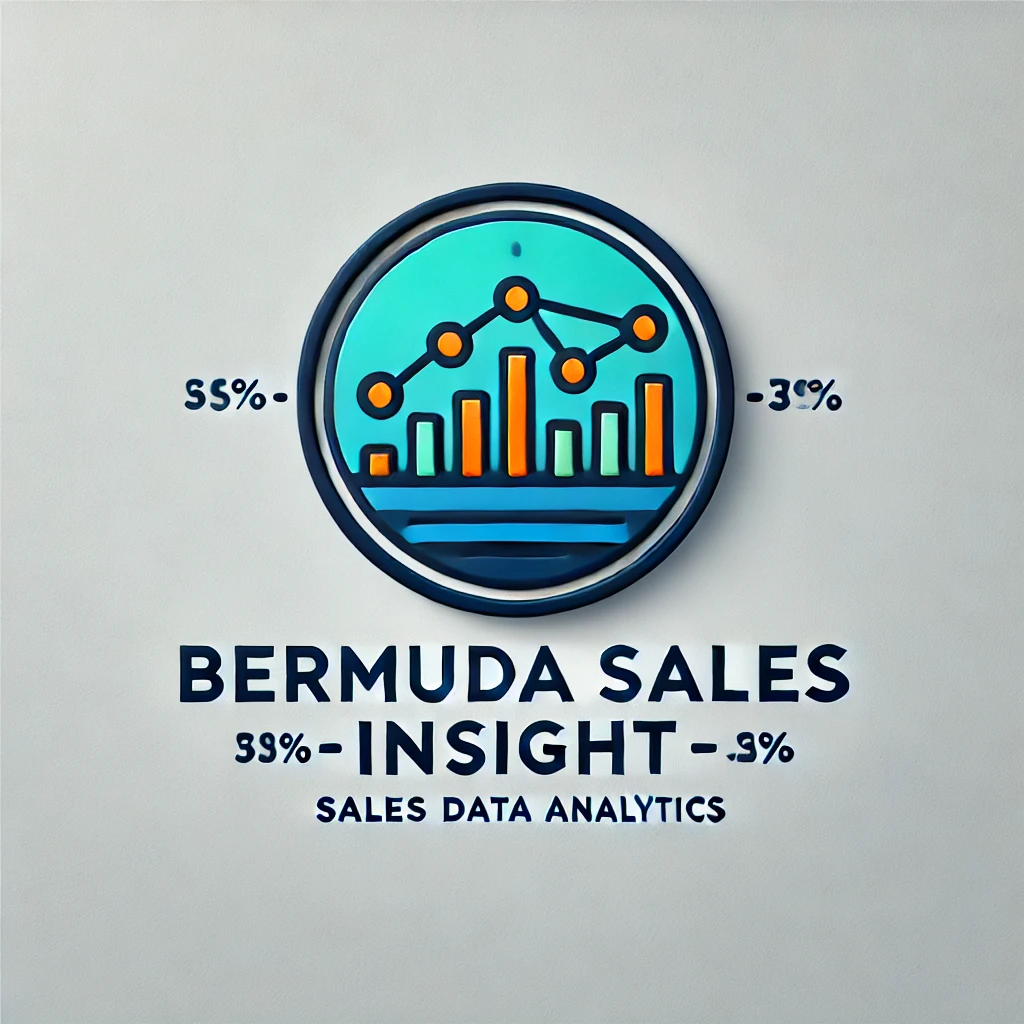

Este código realiza uma análise detalhada das vendas de uma empresa, utilizando um arquivo Excel com os dados. A análise foca no faturamento, ticket médio, produtos mais vendidos, e divisão dos valores por faixas de preço. A seguir, são calculados:

Faturamento Total: Soma de todos os valores finais de vendas.
Faturamento por Loja: Soma dos valores de vendas por loja.
Faturamento por Produto: Soma das vendas por produto em cada loja.
Faturamento Diário: Soma das vendas por dia.
Faturamento Mensal por Loja: Soma das vendas por loja em cada mês.
Ticket Médio por Loja e Produto: Média de vendas por loja e por produto.
Top Produtos por Valor e Quantidade: Identificação dos produtos com maior faturamento e os mais vendidos.
Faixa de Preço: Distribuição dos produtos por faixas de preço, com análise do faturamento por faixa.

In [45]:
import pandas as pd

In [46]:
tabela = pd.read_excel("Vendas.xlsx")
tabela.head(10)

,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,2019-12-01,Iguatemi Campinas,Bermuda Estampa,1,169,169
1,2019-12-01,Iguatemi Esplanada,Bermuda Xadrez,1,155,155
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
3,2019-12-01,Iguatemi Campinas,Bermuda Listrado,3,163,489
4,2019-12-01,Iguatemi Campinas,Bermuda Linho,3,195,585
5,2019-12-03,Iguatemi Campinas,Bermuda Xadrez,1,155,155
6,2019-12-03,Bourbon Shopping SP,Bermuda Listrado,1,163,163
7,2019-12-03,Bourbon Shopping SP,Bermuda Xadrez,3,155,465
8,2019-12-03,Bourbon Shopping SP,Bermuda Estampa,1,169,169
9,2019-12-04,Center Shopping Uberlândia,Bermuda Xadrez,4,155,620


In [7]:
faturamento_total = tabela["Valor Final"].sum()

In [8]:
print(faturamento_total)

55895


**-Calculando o faturamento Total de Cada Loja:**

In [12]:
faturamento_lojas = tabela[["ID Loja", "Valor Final"]].groupby("ID Loja").sum()
display(faturamento_lojas)

,Valor Final
ID Loja,
Bourbon Shopping SP,4386
Center Shopping Uberlândia,2994
Iguatemi Campinas,41720
Iguatemi Esplanada,2473
Norte Shopping,4322


**-Calculando o Faturamento de Cada Produto (BERMUDA):**

In [21]:
faturamento_produto = tabela[["ID Loja","Produto", "Valor Final"]].groupby(["ID Loja", "Produto"]).sum()
display(faturamento_produto)

Valor Final
ID Loja                    Produto                      
Bourbon Shopping SP        Bermuda                   750
                           Bermuda Estampa          1183
                           Bermuda Linho             195
                           Bermuda Listrado         1793
                           Bermuda Xadrez            465
Center Shopping Uberlândia Bermuda Estampa           338
                           Bermuda Linho             780
                           Bermuda Listrado          326
                           Bermuda Xadrez           1550
Iguatemi Campinas          Bermuda                  1200
                           Bermuda Estampa           845
                           Bermuda Linho            1170
                           Bermuda Liso            36581
                           Bermuda Listrado         1304
                           Bermuda Xadrez            620
Iguatemi Esplanada         Bermuda                   150
                           Bermuda Estampa           338
                           Bermuda Linho            1365
                           Bermuda Xadrez            620
Norte Shopping             Bermuda                  1350
                           Bermuda Estampa           845
                           Bermuda Linho             390
                           Bermuda Listrado          652
                           Bermuda Xadrez           1085

In [22]:
tabela["Data"] = pd.to_datetime(tabela["Data"])

faturamento_diario = tabela.groupby(tabela["Data"].dt.date)["Valor Final"].sum()
display(faturamento_diario)

,Valor Final
Data,
2019-12-01,1698
2019-12-03,952
2019-12-04,1708
2019-12-05,9398
2019-12-06,169
2019-12-07,605
2019-12-08,1456
2019-12-09,465
2019-12-10,163


**-Aqui estamos calculando o total mensal de faturamento das Lojas:**

In [25]:
faturamento_mensal_loja = tabela.groupby([tabela["Data"].dt.to_period("M"), "ID Loja"])["Valor Final"].sum().unstack()
display(faturamento_mensal_loja)

ID Loja,Bourbon Shopping SP,Center Shopping Uberlândia,Iguatemi Campinas,Iguatemi Esplanada,Norte Shopping
Data,,,,,
2019-12,4386,2994,41720,2473,4322


**-Aqui estamos analisando o ticket médio :)**

In [28]:
ticket_medio_loja = tabela.groupby("ID Loja")["Valor Final"].mean()
display(ticket_medio_loja)

ticket_medio_produto = tabela.groupby("Produto")["Valor Final"].mean()
display(ticket_medio_produto)

ticket_medio_loja = tabela.groupby("ID Loja")["Valor Final"].mean()
display(ticket_medio_loja)

ticket_medio_produto = tabela.groupby("Produto")["Valor Final"].mean()
display(ticket_medio_produto)

,Valor Final
ID Loja,
Bourbon Shopping SP,337.384615
Center Shopping Uberlândia,332.666667
Iguatemi Campinas,2607.500000
Iguatemi Esplanada,309.125000
Norte Shopping,392.909091


,Valor Final
Produto,
Bermuda,383.333333
Bermuda Estampa,354.900000
Bermuda Linho,487.500000
Bermuda Liso,12193.666667
Bermuda Listrado,313.461538
Bermuda Xadrez,310.000000


,Valor Final
ID Loja,
Bourbon Shopping SP,337.384615
Center Shopping Uberlândia,332.666667
Iguatemi Campinas,2607.500000
Iguatemi Esplanada,309.125000
Norte Shopping,392.909091


,Valor Final
Produto,
Bermuda,383.333333
Bermuda Estampa,354.900000
Bermuda Linho,487.500000
Bermuda Liso,12193.666667
Bermuda Listrado,313.461538
Bermuda Xadrez,310.000000


In [29]:
top_produtos_valor = tabela.groupby("Produto")["Valor Final"].sum().sort_values(ascending=False)
display(top_produtos_valor)

top_produtos_quantidade = tabela.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)
display(top_produtos_quantidade)

,Valor Final
Produto,
Bermuda Liso,36581
Bermuda Xadrez,4340
Bermuda Listrado,4075
Bermuda Linho,3900
Bermuda Estampa,3549
Bermuda,3450


,Quantidade
Produto,
Bermuda Liso,233
Bermuda Xadrez,28
Bermuda Listrado,25
Bermuda,23
Bermuda Estampa,21
Bermuda Linho,20


In [30]:
bins = [0, 50, 100, 200, 500, 1000]
labels = ["0-50", "51-100", "101-200", "201-500", "501+"]
tabela["Faixa de Preço"] = pd.cut(tabela["Valor Final"], bins=bins, labels=labels)

faturamento_faixa_preco = tabela.groupby("Faixa de Preço")["Valor Final"].sum()
display(faturamento_faixa_preco)

<ipython-input-30-0e0e31811b44>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faturamento_faixa_preco = tabela.groupby("Faixa de Preço")["Valor Final"].sum()


,Valor Final
Faixa de Preço,
0-50,0
51-100,0
101-200,4117
201-500,5763
501+,9434
